# Using the Notebook

This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run Step 0 before running any other cells in the notebook) 

Instructions as to how to set up Python and the iPython notebook on your personal computer are attached in the appendix of the lab

## Step 0: Import Necessary Packages

In [1]:
%pylab inline
from SeisWidgetImport import *

Populating the interactive namespace from numpy and matplotlib


# Two common-mid-point (CMP) gathers: Clean and Noisy

We have two CMP gathers generated from different geologic models. One data set is clean and the other is contaminated with noise. The seismic data were adapted from SeismicLab (http://seismic-lab.physics.ualberta.ca/). 

In this notebook, we will walk through how to construct a normal incidence seismogram from these data sets.

We will do this in the following steps:
- Plot the data
- Fit a hyperbola to the reflection event in the data
- Perform the NMO correction and stack

## Step 1: Plot the data

As you can see from clean CMP gather, you can recognize that we have only have one reflector, meaning there is a single interface seperating two geologic units visible in these data. 
(Note: The direct and any refracted arrivals have been removed). 

It is difficult to distinguish any reflectors in the noisy data. However, there is a single reflector in these data, and we will perform normal moveout (NMO) and stacking operations to construct a normal-incidence seismogram where this reflector is visible.  

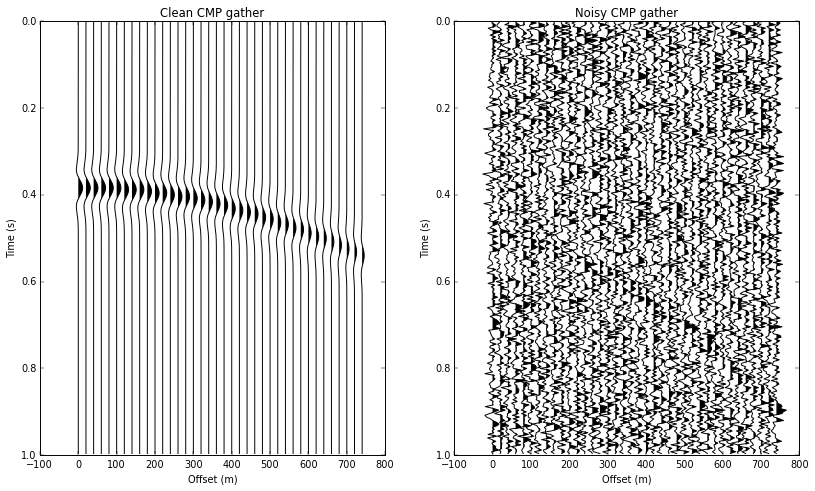

In [2]:
# Plot the data
ViewWiggle(syndata, obsdata)

### Step 2: Fit A Hyperbola to the Data

- Each reflection event in a CMP gather has a travel time that corresponds to a hyperbola: $$ t(x) = \sqrt{\frac{x^2}{v^2_{stacking}} + t_0^2} \\$$ where $x$ is offset between source and receiver, $v_{stacking}$ is stacking velocity, and $t_0$ is the intercept time: $$ t_0 = \sqrt{\frac{4d^2}{v^2_{stacking}}} \\$$ where $d$ is the thickness of the first layer.

- For each reflection event hyperbola, perform a velocity analysis to find $v_{stacking}$. This is done by first choosing $t_o$. Then choose a trial value of velocity. <img src="http://www.eos.ubc.ca/courses/eosc350/content/methods/meth_10d/assets/kearey_fig4_21.gif"></img>

- Calculate the Normal Moveout Correction: Using the hyperbolia corresponding to $v_{stacking}$, compute the normal moveout for each trace and then adjust the reflection time by the amount $\triangle T$: $$ \triangle T = t_0-t(x) \\ $$ <img src="http://www.eos.ubc.ca/courses/eosc350/content/methods/meth_10d/assets/ch1_fig8.gif"></img>

Estimate $t_0$ and $v_{stack}$, then apply NMO correction (For clean CMP gather)

None

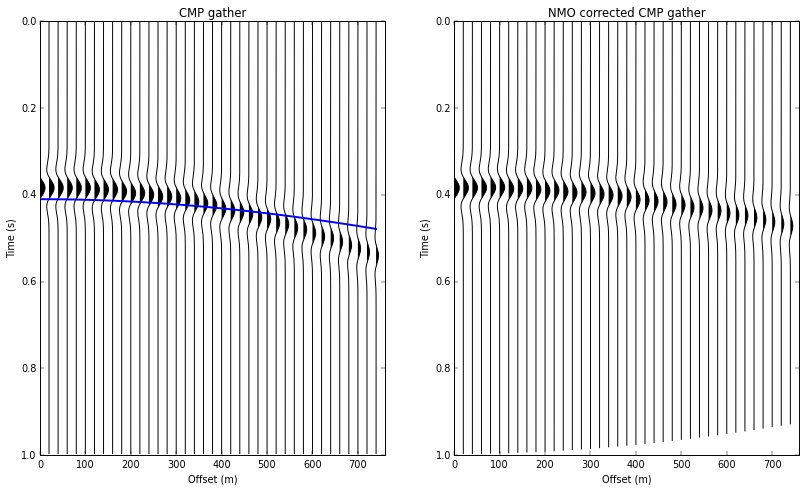

In [3]:
# Fit hyperbola to clean data
clean = interact(CleanNMOWidget, t0 = (0.2, 0.8, 0.01), v = (1000., 5000., 100.))

### Step 2: Stack the NMO corrected Data (For clean CMP gather)

Now that you have performed the NMO correction to flatten the reflection event, we can stack (or average) the corrected traces. This step is essential when the seismic data are contaminated with noise.

Enter the intercept time (t0_clean) and stacking velocity (vstack_clean) and execute the next cell to perform the stacking. 

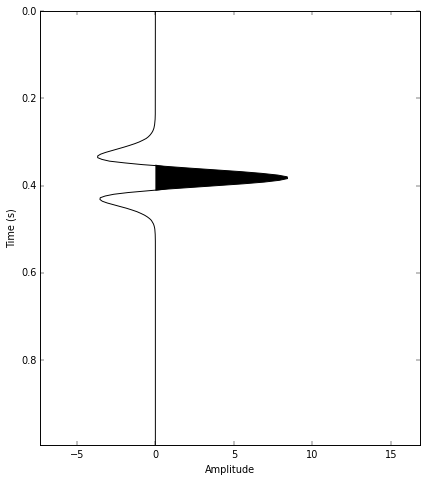

In [4]:
#Input estimated stacking velocity for clean CMP gahter and run below cell by pressing shift + enter
t0_clean     = 0.1
vstack_clean = 3500.
NMOstackSingle(syndata, t0_clean, vstack_clean)

### Step 3: Applying NMO correction to the Noisy Data

Compared to the previous data set, this one is quite noisy. There is a reflector in the data, and your goal is to construct a stacked trace where this reflection is visible. 

First, estimate one $t_0$, and three plausible $v_{stack}$, v1,v2,v3. These three hyperbolas will be drawn on the panel on the left. The velocity used to perform the NMO correction, shown in the panel on the right, is $v_2$ (red).  

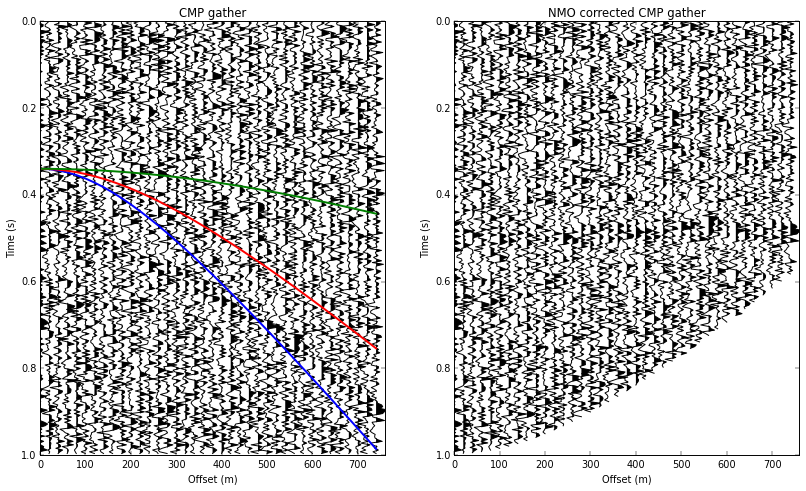

In [5]:
noisy = interact(NoisyNMOWidget, t0 = (0.1, 0.6, 0.01), v1 = (200., 1500., 100.), v2 = (800., 2500., 100.), v3 = (1800., 3500., 100.))

### Step 4: Apply CMP stack with estimated $v_{stack}$ (For noisy CMP gather)

In the previous step, you chose a single intercept time and three stacking velocities. Enter the intercept time (t0_noisy), and the three possible stacking velocities as vstack_noisy1, vstack_noisy2, vstack_noisy3 and execute the cell to construct the stacked trace for each of the velocities you entered.

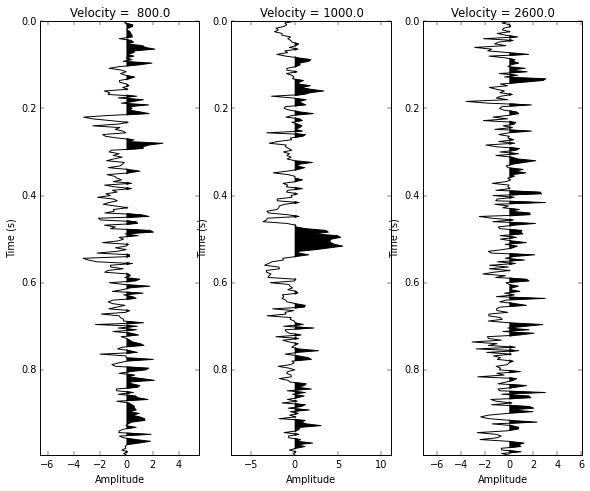

In [7]:
t0_noisy = 0.2
vstack_noisy1 = 800.
vstack_noisy2 = 1600.
vstack_noisy3 = 2600.
NMOstackthree(obsdata, t0_noisy, vstack_noisy1, vstack_noisy2, vstack_noisy3)